In [46]:
%autosave 10
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [9]:
df = pd.read_csv('cleaned_data.csv')
df['default payment next month'].mean()

0.2217971797179718

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [20]:
from sklearn.linear_model import LogisticRegression
lr_obj = LogisticRegression()
lr_obj.fit(X_train,y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [27]:
predicted_values = lr_obj.predict(X_test)
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [36]:
from sklearn import metrics
pred_proba = lr_obj.predict_proba(X_test)
area_by_lmt_bal = metrics.roc_auc_score(y_test, pred_proba[:,1])
area_by_lmt_bal

0.6201990844642832

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)
lr_obj2 = LogisticRegression()
lr_obj2.fit(X_train2, y_train2)

LogisticRegression()

In [57]:
pred_proba2 = lr_obj2.predict_proba(X_test2)
area_by_education = metrics.roc_auc_score(y_test2, pred_proba2[:,1])
area_by_education

0.5434650477972642

In [58]:
print("ROC-AUC of LIMIT_BAL is grater than EDUCATION")

ROC-AUC of LIMIT_BAL is grater than EDUCATION


_________________________________________________________________________
**Now, plot the ROC curve.**


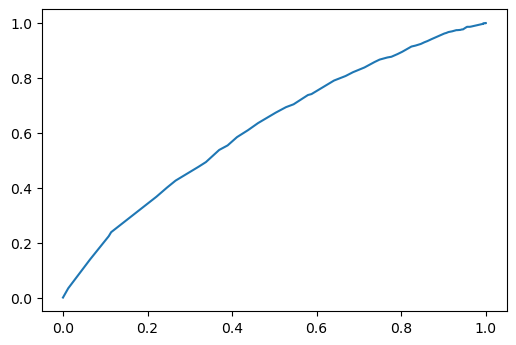

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba[:,1])
plt.plot(fpr,tpr)

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [60]:
P = sum(y_test)
TP = sum( (y_test==1) & (predicted_values==1) )
FN = sum( (y_test==1) & (predicted_values==0) )
TN = sum((y_test==0) & (predicted_values==0))
FP = sum((y_test==0) & (predicted_values==1))
precision = TP/(TP + FP)
recall = TP/P

<ipython-input-60-79bcb37f5d3a>:6: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP + FP)


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


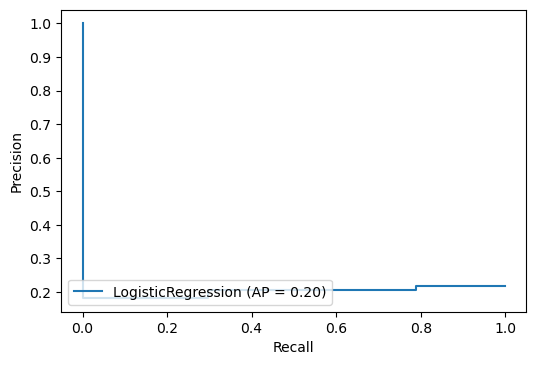

In [61]:
metrics.plot_precision_recall_curve(lr_obj, X_test, y_test)

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [63]:
metrics.average_precision_score(y_test2, lr_obj2.predict_proba(X_test)[:,1])

0.23480414538268662

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [65]:
train_prob = lr_obj.predict_proba(X_train)
metrics.roc_auc_score(y_train, train_prob[:,1])

0.47559341937176897

    How is this different, conceptually and quantitatively, from your earlier calculation?


### The ROC-AUC score of testing data is 0.62 whether for the training data it is 0.475